In [41]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.layers import (Conv2D, BatchNormalization, Activation, MaxPooling2D, GlobalAveragePooling2D, 
                                     Dense, Flatten, Dropout)
from tensorflow.keras.optimizers import RMSprop, Adam, SGD
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import CSVLogger, ModelCheckpoint, ReduceLROnPlateau
import os  
import cv2 
import torch  
import imghdr  
import torchvision  
import numpy as np  
import pandas as pd 
import tensorflow as tf  
import matplotlib.pyplot as plt  
from sklearn.utils import shuffle 
from tensorflow.keras import layers  
from tensorflow.keras.models import Sequential  
from tensorflow.keras.optimizers import RMSprop 
from tensorflow.keras.applications import VGG16 
from tensorflow.keras.applications.vgg16 import preprocess_input 
from tensorflow.keras.preprocessing.image import ImageDataGenerator  
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy  
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout  

In [42]:
#Importing our datasets
data_dir = '/kaggle/input/dataset1/filtered aug dataset'

In [43]:
#Building Data pipeline
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 11257 files belonging to 2 classes.


In [44]:
#resizing shape to none,224,224,3
import tensorflow as tf

# Assuming `dataset` is your original dataset with images of shape (256, 256, 3)
target_height, target_width = 224, 224

def resize_images(image, label):
    # Resize the image to the desired shape
    image = tf.image.resize(image, [target_height, target_width])
    return image, label

# Apply the resizing transformation to the dataset
data = data.map(resize_images)


In [45]:
# Converting the dataset to an iterator
data_iterator = data.as_numpy_iterator()

# Acessing a batch from the Datapipeline
batch = data_iterator.next()
len(batch)

2

In [46]:
# Converting the features array into a DataFrame
df_features = pd.DataFrame(batch[1])
print(df_features)

    0
0   1
1   1
2   0
3   0
4   0
5   1
6   1
7   0
8   1
9   1
10  0
11  0
12  0
13  1
14  1
15  1
16  0
17  0
18  0
19  1
20  1
21  0
22  1
23  1
24  1
25  1
26  0
27  1
28  1
29  1
30  1
31  1


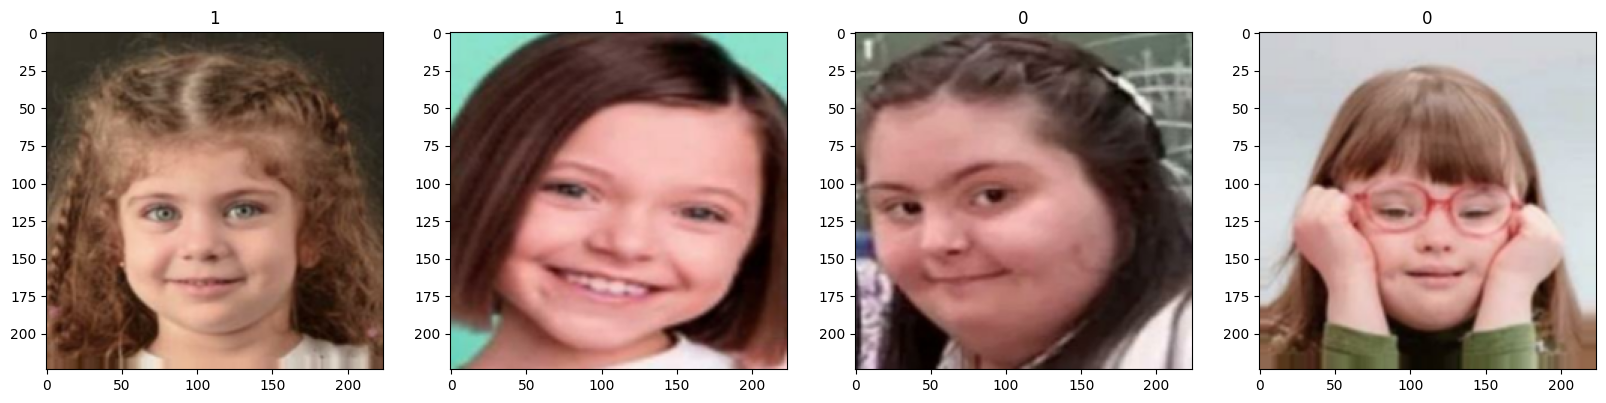

In [47]:
#Data visualization
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [48]:
#Data Preprocessing

#Data scaling
data = data.map(lambda x, y: (x / 255.0, y))  # Scale images to [0, 1]

# Verifying scaling
print(data.as_numpy_iterator().next()[0].min())  # Should print 0.0

0.0


In [49]:
#Data splitting
train_size = int(len(data)*.7)
val_size = int(len(data)*.15)
test_size = int(len(data)*.15)

In [50]:
#Assigning suitable variable names
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [51]:
# Load your original TensorFlow model
model = tf.keras.models.load_model('/kaggle/input/distilled_student_model/keras/default/1/distilled_student_model.keras')

# Fine-tune with new data
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Assume `train_data` and `val_data` are prepared
model.fit(train, validation_data=val, epochs=5)

# Save and convert back to TFLite
model.save('updated_model.h5')

# Convert to TFLite
converter = tf.lite.TFLiteConverter.from_saved_model('updated_model.h5')
tflite_model = converter.convert()

# Save the TFLite model
with open('updated_model.tflite', 'wb') as f:
    f.write(tflite_model)


Epoch 1/5
246/246 ━━━━━━━━━━━━━━━━━━━━ 39s 109ms/step - accuracy: 0.9822 - loss: 0.2275 - val_accuracy: 0.9934 - val_loss: 0.0657
Epoch 2/5
246/246 ━━━━━━━━━━━━━━━━━━━━ 15s 62ms/step - accuracy: 0.9811 - loss: 0.2128 - val_accuracy: 0.9892 - val_loss: 0.1399
Epoch 3/5
246/246 ━━━━━━━━━━━━━━━━━━━━ 16s 63ms/step - accuracy: 0.9836 - loss: 0.2205 - val_accuracy: 0.9940 - val_loss: 0.0629
Epoch 4/5
246/246 ━━━━━━━━━━━━━━━━━━━━ 15s 62ms/step - accuracy: 0.9809 - loss: 0.2263 - val_accuracy: 0.9928 - val_loss: 0.0972
Epoch 5/5
246/246 ━━━━━━━━━━━━━━━━━━━━ 16s 63ms/step - accuracy: 0.9798 - loss: 0.2523 - val_accuracy: 0.9952 - val_loss: 0.0691


OSError: SavedModel file does not exist at: updated_model.h5/{saved_model.pbtxt|saved_model.pb}

In [52]:
import tensorflow as tf

# Load the Keras .h5 model
model = tf.keras.models.load_model('/kaggle/working/updated_model.h5')

# Convert to TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the converted TFLite model
with open('updated_model.tflite', 'wb') as f:
    f.write(tflite_model)

print("Model successfully converted to TFLite!")


Saved artifact at '/tmp/tmpb7j016ri'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_layer_3')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  140441952707408: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140441952712336: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140441952789152: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140441952790736: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140441952784576: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140441952786864: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140441952920752: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140441952918816: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140441952923920: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140441952925680: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1404419529232

In [53]:
import tensorflow as tf
import numpy as np

# Load the TFLite model
interpreter = tf.lite.Interpreter(model_path="/kaggle/working/updated_model.tflite")
interpreter.allocate_tensors()

# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()


In [54]:
# Initialize variables to calculate accuracy
correct_predictions = 0
total_samples = 0

# Loop through the test dataset
for batch in test.as_numpy_iterator():
    images, labels = batch  # Get images and labels from the batch

    # Ensure input data matches the required shape
    images = tf.image.resize(images, (input_details[0]['shape'][1], input_details[0]['shape'][2]))  # Resize if needed
    images = images.numpy().astype(np.float32)  # Ensure correct data type

    # Run inference for each image in the batch
    for i in range(len(images)):
        input_data = np.expand_dims(images[i], axis=0)  # Add batch dimension
        interpreter.set_tensor(input_details[0]['index'], input_data)
        interpreter.invoke()

        # Get the predicted output
        output_data = interpreter.get_tensor(output_details[0]['index'])
        predicted_label = 1 if output_data[0] > 0.5 else 0  # Binary classification threshold = 0.5

        # Compare with the true label
        if predicted_label == labels[i]:
            correct_predictions += 1
        total_samples += 1

# Calculate accuracy
accuracy = correct_predictions / total_samples
print(f"Accuracy of the TFLite model on the test dataset: {accuracy * 100:.2f}%")


Accuracy of the TFLite model on the test dataset: 99.58%


In [55]:
import tensorflow as tf

# Load your original model (if not already loaded)
model = tf.keras.models.load_model('/kaggle/working/updated_model.h5')

# Convert the model to TensorFlow Lite with float16 quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]  # Use optimization to reduce model size
converter.target_spec.supported_types = [tf.float16]  # Specify float16 quantization

# Convert and save the model
tflite_model_float16 = converter.convert()

# Save the quantized TFLite model
with open('updated_model_float16.tflite', 'wb') as f:
    f.write(tflite_model_float16)

print("Model successfully converted to TFLite with float16 quantization!")


Saved artifact at '/tmp/tmphwu0m51n'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_layer_3')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  140441596791088: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140441596796016: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140441596823504: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140441596824736: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140441596802352: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140441596804640: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140441596833184: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140441596923568: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140441596925152: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140441596926912: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1404415969244

In [56]:
# Load the quantized TFLite model
interpreter = tf.lite.Interpreter(model_path="/kaggle/working/updated_model_float16.tflite")
interpreter.allocate_tensors()

# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Initialize variables to calculate accuracy
correct_predictions = 0
total_samples = 0

# Loop through the test dataset
for batch in test.as_numpy_iterator():
    images, labels = batch  # Get images and labels from the batch

    # Ensure input data matches the required shape
    images = tf.image.resize(images, (input_details[0]['shape'][1], input_details[0]['shape'][2]))  # Resize if needed
    images = images.numpy().astype(np.float32)  # Ensure correct data type

    # Run inference for each image in the batch
    for i in range(len(images)):
        input_data = np.expand_dims(images[i], axis=0)  # Add batch dimension
        interpreter.set_tensor(input_details[0]['index'], input_data)
        interpreter.invoke()

        # Get the predicted output
        output_data = interpreter.get_tensor(output_details[0]['index'])
        predicted_label = 1 if output_data[0] > 0.5 else 0  # Binary classification threshold = 0.5

        # Compare with the true label
        if predicted_label == labels[i]:
            correct_predictions += 1
        total_samples += 1

# Calculate accuracy
accuracy = correct_predictions / total_samples
print(f"Accuracy of the TFLite model with float16 quantization on the test dataset: {accuracy * 100:.2f}%")


Accuracy of the TFLite model with float16 quantization on the test dataset: 99.52%


In [57]:
# Load the quantized TFLite model
interpreter = tf.lite.Interpreter(model_path="/kaggle/working/updated_model_float16.tflite")
interpreter.allocate_tensors()

# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

from sklearn.metrics import precision_score, recall_score, f1_score

# Initialize variables to calculate metrics
correct_predictions = 0
total_samples = 0
true_labels = []
predicted_labels = []

# Loop through the test dataset
for batch in test.as_numpy_iterator():
    images, labels = batch  # Get images and labels from the batch

    # Ensure input data matches the required shape
    images = tf.image.resize(images, (input_details[0]['shape'][1], input_details[0]['shape'][2]))  # Resize if needed
    images = images.numpy().astype(np.float32)  # Ensure correct data type

    # Run inference for each image in the batch
    for i in range(len(images)):
        input_data = np.expand_dims(images[i], axis=0)  # Add batch dimension
        interpreter.set_tensor(input_details[0]['index'], input_data)
        interpreter.invoke()

        # Get the predicted output
        output_data = interpreter.get_tensor(output_details[0]['index'])
        predicted_label = 1 if output_data[0] > 0.5 else 0  # Binary classification threshold = 0.5

        # Store true and predicted labels
        true_labels.append(labels[i])
        predicted_labels.append(predicted_label)

        # Calculate accuracy
        if predicted_label == labels[i]:
            correct_predictions += 1
        total_samples += 1

# Calculate accuracy
accuracy = correct_predictions / total_samples
print(f"Accuracy: {accuracy * 100:.2f}%")

# Calculate precision, recall, and F1-score
precision = precision_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels)

# Print the metrics
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1-Score: {f1 * 100:.2f}%")


Accuracy: 99.52%
Precision: 99.17%
Recall: 99.88%
F1-Score: 99.52%


In [58]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay
import seaborn as sns


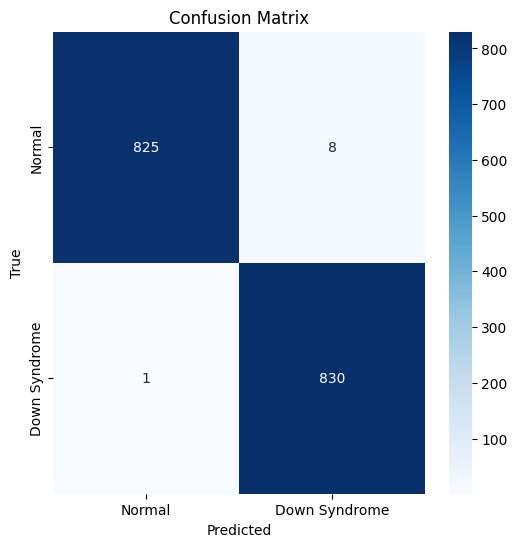

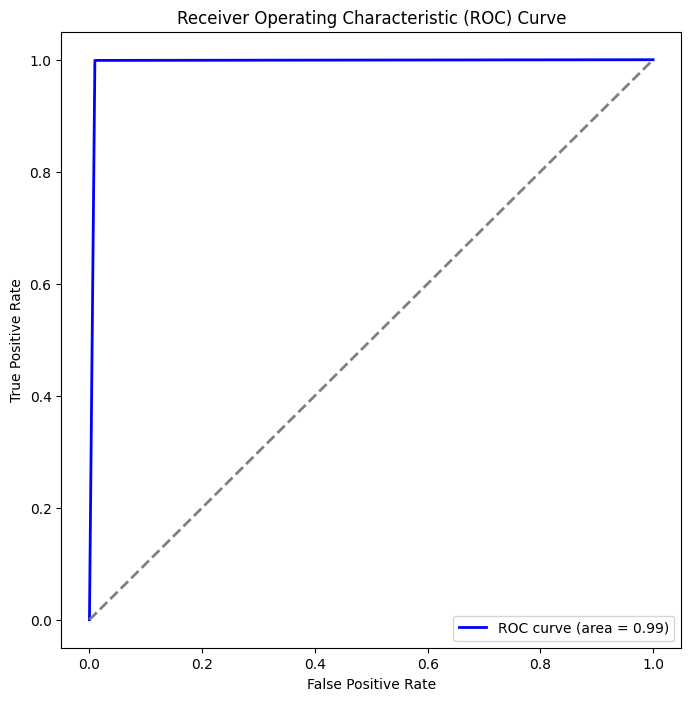

In [59]:
# Load the quantized TFLite model
interpreter = tf.lite.Interpreter(model_path="/kaggle/working/updated_model_float16.tflite")
interpreter.allocate_tensors()

# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()


from sklearn.metrics import confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize variables to calculate metrics
true_labels = []
predicted_labels = []

# Loop through the test dataset
for batch in test.as_numpy_iterator():
    images, labels = batch  # Get images and labels from the batch

    # Ensure input data matches the required shape
    images = tf.image.resize(images, (input_details[0]['shape'][1], input_details[0]['shape'][2]))  # Resize if needed
    images = images.numpy().astype(np.float32)  # Ensure correct data type

    # Run inference for each image in the batch
    for i in range(len(images)):
        input_data = np.expand_dims(images[i], axis=0)  # Add batch dimension
        interpreter.set_tensor(input_details[0]['index'], input_data)
        interpreter.invoke()

        # Get the predicted output
        output_data = interpreter.get_tensor(output_details[0]['index'])
        predicted_label = 1 if output_data[0] > 0.5 else 0  # Binary classification threshold = 0.5

        # Store true and predicted labels
        true_labels.append(labels[i])
        predicted_labels.append(predicted_label)

# Confusion Matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "Down Syndrome"], yticklabels=["Normal", "Down Syndrome"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(true_labels, predicted_labels)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8,8))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')  # Diagonal line for random classifier
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()